## $\textbf{R}$${obust}$ $\textbf{L}$${inear}$ $\textbf{M}$${odels}$

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

from statsmodels.sandbox.regression.predstd import wls_prediction_std

from matplotlib import pyplot

from random import random
from random import randint
from random import seed

### $\textit{Function cell}$

In [2]:
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model, _type):
    # plot the dataset
    pyplot.scatter(X, y)
    # plot the line of best fit
    if _type == "sklearn":
        xaxis = np.arange(X.min(), X.max(), 0.01)
        yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
    else:
        xaxis = np.arange(X.min(), X.max(), 0.01)
        _xaxis = sm.add_constant(xaxis)
        yaxis = model.predict(_xaxis.reshape((len(xaxis), 2)))
    pyplot.plot(xaxis, yaxis, color='r')
    # show the plot
    pyplot.title(type(model).__name__)
    pyplot.show()
    pyplot.clf()

### $\textit{Reading}$ $\textit{Data}$

(100, 1) (100,)


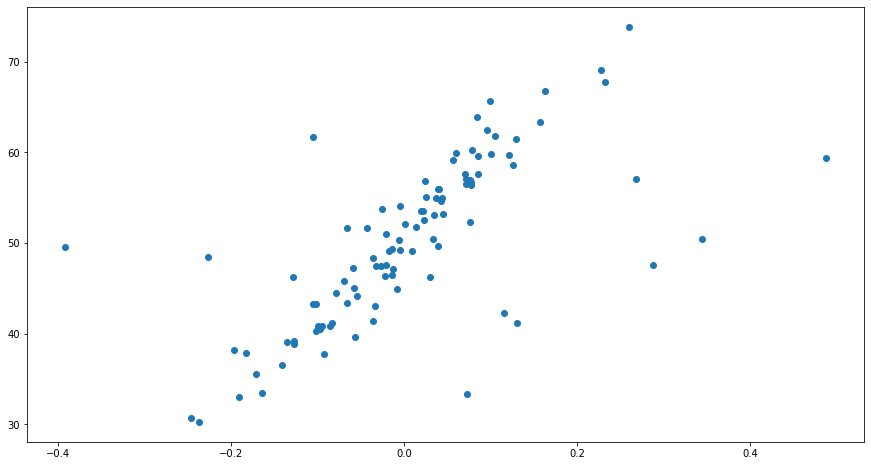

<Figure size 432x288 with 0 Axes>

In [3]:
# dummy data

# create a regression dataset with outliers
# prepare the dataset
def get_dataset():
    X, y = make_regression(n_samples=100,
                           n_features=1, 
                           tail_strength=0.9,
                           effective_rank=1,
                           n_informative=1,
                           noise=3, 
                           bias=50, random_state=1)
    # add some artificial outliers
    seed(1)
    for i in range(10):
        factor = randint(2, 4)
        if random() > 0.5:
            X[i] += factor * X.std()
        else:
            X[i] -= factor * X.std()
    return X, y

# load dataset
X, y = get_dataset()
# summarize shape
print(X.shape, y.shape)
# scatter plot of input vs output
pyplot.figure(figsize=(15,8))
pyplot.scatter(X, y)
pyplot.show()
pyplot.clf()

### $\textit{Train and Test data}$ 

In [6]:
X_train = X[:-10]
y_train = y[:-10]
X_test = X[90:]
y_test = y[90:]

### $\textit{Linear Regression on dummy data}$ 

In [9]:
# Constant column added for intercept 
X_new = sm.add_constant(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     72.03
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           4.66e-13
Time:                        11:10:13   Log-Likelihood:                -298.97
No. Observations:                  90   AIC:                             601.9
Df Residuals:                      88   BIC:                             606.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.6275      0.715     69.413      0.0

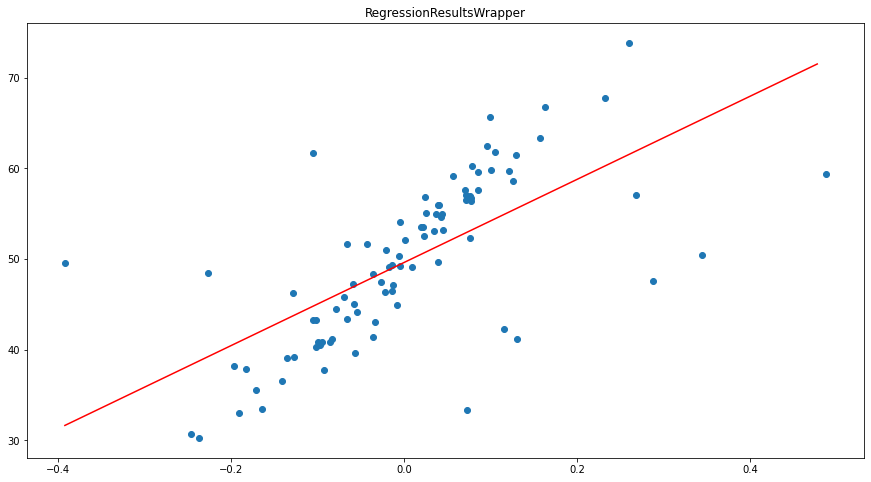

<Figure size 432x288 with 0 Axes>

In [7]:
# Regression using sm.OLS
statsmodel_model = sm.OLS(y_train, X_new)
statsmodel_fit = statsmodel_model.fit()

print(statsmodel_fit.summary())
pyplot.figure(figsize=(15,8))
plot_best_fit(X_train, y_train, statsmodel_fit, "statsmodels")

[45.82531156]
49.62751224353549


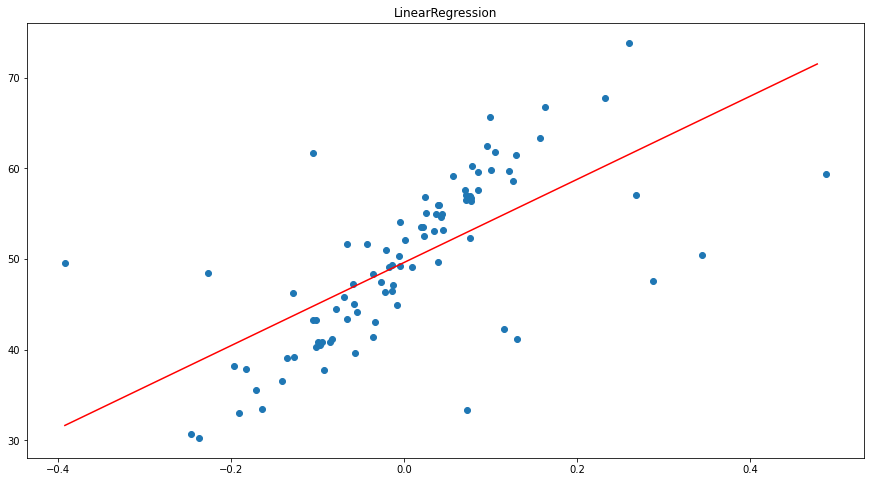

<Figure size 432x288 with 0 Axes>

In [7]:
# Regression using sklearn
sk_model = LinearRegression(fit_intercept=True)
sk_fit = sk_model.fit(X_train, y_train)

print(sk_fit.coef_)
print(sk_fit.intercept_)
pyplot.figure(figsize=(15,8))
plot_best_fit(X_train, y_train, sk_fit, "sklearn")

#### $\textit{Robust Regression on dummy data}$ 

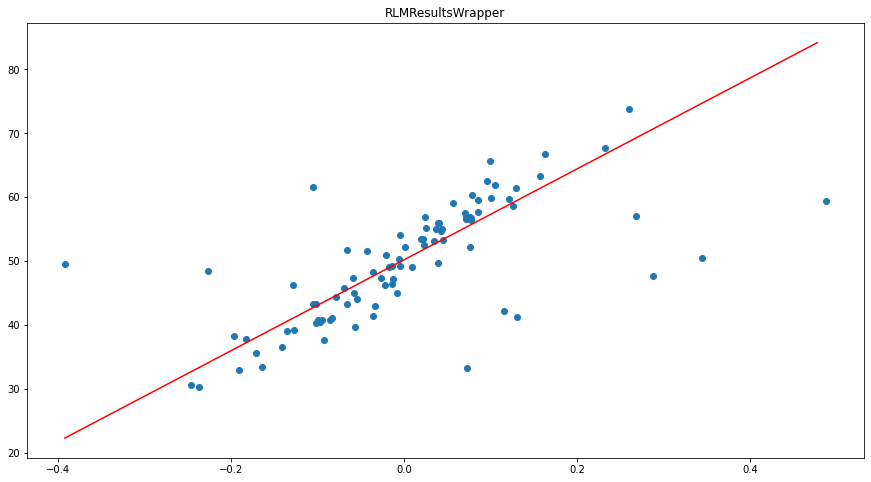

<Figure size 432x288 with 0 Axes>

In [8]:
rlm_model = sm.RLM(endog=y_train, 
                   exog=X_new, 
                   M=sm.robust.norms.HuberT())
rlm_results = rlm_model.fit()

pyplot.figure(figsize=(15,8))
plot_best_fit(X_train, y_train, rlm_results, "statsmodels")

$\textbf{Weightages to each observation}$ 

In [9]:
rlm_results.weights

array([0.39827092, 0.33993668, 0.20123829, 0.21189827, 0.25787357,
       0.26714016, 0.17926733, 0.3020011 , 0.19117227, 0.22104364,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.8321596 , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.98811127,
       1.        , 1.        , 1.        , 0.78801131, 1.        ,
       0.93665817, 1.        , 1.        , 1.        , 0.96051293,
       0.89040655, 0.5775073 , 1.        , 1.        , 1.        ,
       0.77687437, 1.        , 0.74674828, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.98151

$\textbf{Params}$ 

In [9]:
rlm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                   90
Model:                            RLM   Df Residuals:                       88
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 04 Jun 2021                                         
Time:                        11:18:28                                         
No. Iterations:                    50                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.2215      0.443    113.388      0.000      49.353      51.090
x1            71.0620      3.345     21.244      0.000      64.506      77.618
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [10]:
print(rlm_results.params)

[50.22147575 71.061995  ]


$\textbf{predict}$ 

In [11]:
x_test = sm.add_constant(X_test)
pred = rlm_results.predict(x_test)
pred

array([51.20575872, 56.20580186, 47.93407868, 66.41819289, 48.37854374,
       52.36711161, 54.45184037, 41.17493219, 48.69234794, 52.60903505])

$\textbf{Confidence intervals}$ 

In [13]:
# Property mse_resid is not present in RLM_Results; hence adding the property to the model
rlm_results.mse_resid = np.sum(np.square(rlm_results.resid))/ len(rlm_results.resid)

In [14]:
pred_std_err, lower_l, upper_l = wls_prediction_std(rlm_results, x_test)

In [15]:
pred_datafrane = pd.DataFrame({
    "actual": list(y_test),
    "prediction": list(pred),
    "lower_interval": list(lower_l),
    "upper_interval": list(upper_l)
})
pred_datafrane

,actual,prediction,lower_interval,upper_interval
0,51.784906,51.205759,36.233603,66.177914
1,63.907868,56.205802,41.224018,71.187585
2,47.491420,47.934079,32.960317,62.907841
3,69.063983,66.418193,51.371521,81.464865
4,53.699550,48.378544,33.405367,63.351720
5,46.202862,52.367112,37.394022,67.340201
6,59.963239,54.451840,39.475097,69.428584
7,38.821519,41.174932,26.178058,56.171806
8,47.543213,48.692348,33.719515,63.665181
9,50.400678,52.609035,37.635652,67.582418
